In [10]:
%pip install editdistance edlib python-Levenshtein polyleven rapidfuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 890.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.1 kB/s eta 0:00:0000:0100:02m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 kB 156.5 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
import csv
import matplotlib.pyplot as plt
import psutil
import random
import time
import editdistance
import Levenshtein
import polyleven
import rapidfuzz
import edlib
import numpy as np
from tqdm import tqdm


In [17]:
input_sizes = np.arange(1000, 100000, 1000)

runtimes_editdistance = []
runtimes_Levenshtein = []
runtimes_polyleven = []
runtimes_rapidfuzz = []
runtimes_edlib = []
cpu_usage = []

# Initialize CPU and RAM usage per library
cpu_usage_editdistance = []
cpu_usage_Levenshtein = []
cpu_usage_polyleven = []
cpu_usage_rapidfuzz = []
cpu_usage_edlib = []
ram_usage_editdistance = []
ram_usage_Levenshtein = []
ram_usage_polyleven = []
ram_usage_rapidfuzz = []
ram_usage_edlib = []


In [18]:
# Progress bar
pbar = tqdm(total=len(input_sizes))

# Run the tests
for size in input_sizes:
    # Generate random strings
    str1 = ''.join(random.choice('atcg') for _ in range(size))
    str2 = ''.join(random.choice('atcg') for _ in range(size))

    start_time = time.time()
    editdistance.eval(str1, str2)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes_editdistance.append(runtime)
    cpu_percent = psutil.cpu_percent()
    cpu_usage.append(cpu_percent)
    cpu_usage_editdistance.append(cpu_percent)
    ram_usage_editdistance.append(psutil.virtual_memory().percent)

    start_time = time.time()
    Levenshtein.distance(str1, str2)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes_Levenshtein.append(runtime)
    cpu_percent = psutil.cpu_percent()
    cpu_usage.append(cpu_percent)
    cpu_usage_Levenshtein.append(cpu_percent)
    ram_usage_Levenshtein.append(psutil.virtual_memory().percent)

    start_time = time.time()
    polyleven.levenshtein(str1, str2)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes_polyleven.append(runtime)
    cpu_percent = psutil.cpu_percent()
    cpu_usage.append(cpu_percent)
    cpu_usage_polyleven.append(cpu_percent)
    ram_usage_polyleven.append(psutil.virtual_memory().percent)

    start_time = time.time()
    rapidfuzz.distance.Levenshtein.distance(str1, str2)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes_rapidfuzz.append(runtime)
    cpu_percent = psutil.cpu_percent()
    cpu_usage.append(cpu_percent)
    cpu_usage_rapidfuzz.append(cpu_percent)
    ram_usage_rapidfuzz.append(psutil.virtual_memory().percent)

    start_time = time.time()
    edlib.align(str1, str2)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes_edlib.append(runtime)
    cpu_percent = psutil.cpu_percent()
    cpu_usage.append(cpu_percent)
    cpu_usage_edlib.append(cpu_percent)
    ram_usage_edlib.append(psutil.virtual_memory().percent)

    pbar.update(1)

pbar.close()


  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [17:09<00:00, 10.40s/it]


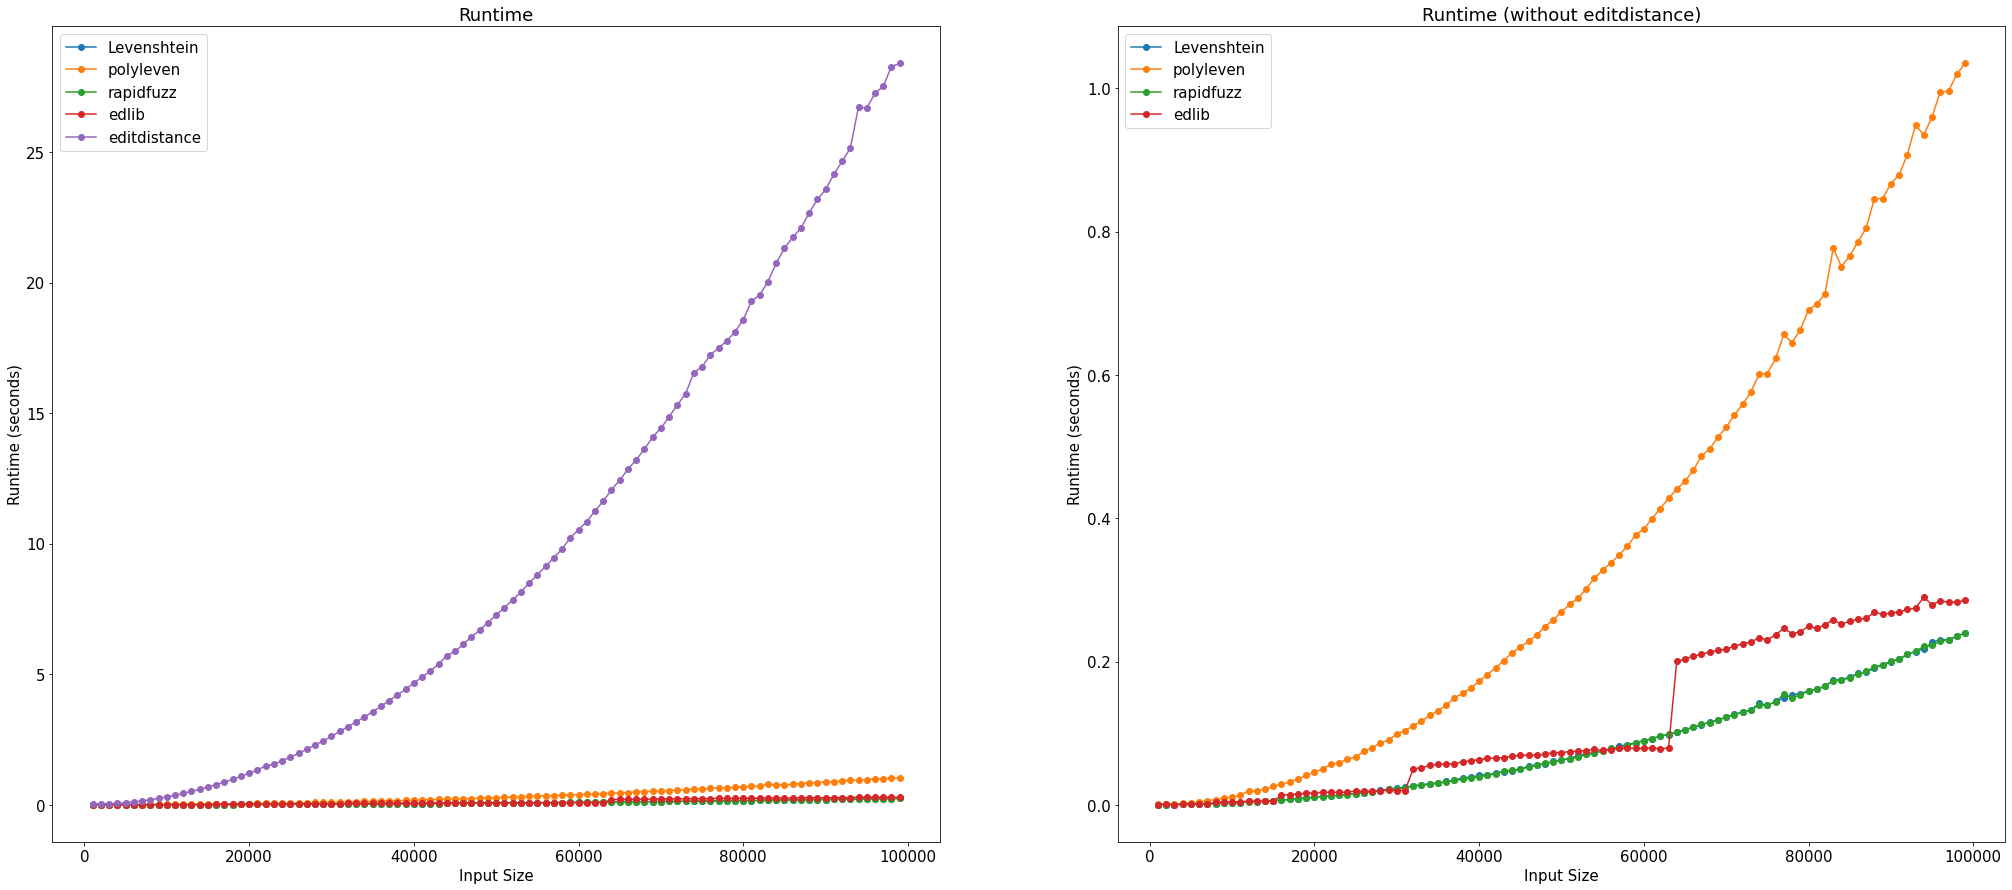

In [23]:
# figure size

plt.figure(figsize=(35, 15))

# font size

plt.rcParams.update({'font.size': 15})

plt.subplot(1, 2, 1)
plt.plot(input_sizes, runtimes_Levenshtein, label='Levenshtein', marker='o')
plt.plot(input_sizes, runtimes_polyleven, label='polyleven', marker='o')
plt.plot(input_sizes, runtimes_rapidfuzz, label='rapidfuzz', marker='o')
plt.plot(input_sizes, runtimes_edlib, label='edlib', marker='o')
plt.plot(input_sizes, runtimes_editdistance, label='editdistance', marker='o')
plt.xlabel('Input Size')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(input_sizes, runtimes_Levenshtein, label='Levenshtein', marker='o')
plt.plot(input_sizes, runtimes_polyleven, label='polyleven', marker='o')
plt.plot(input_sizes, runtimes_rapidfuzz, label='rapidfuzz', marker='o')
plt.plot(input_sizes, runtimes_edlib, label='edlib', marker='o')
plt.xlabel('Input Size')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime (without editdistance)')
plt.legend()
